<h3>Loading and displaying all European Soudal plants</h3>
<blockquote>The script loads the geopandas module. The module is first used for loading the csv containing the European plants. A GeoDataFrame is then created, with the x and y being defined so the rows in the Geodataframe can be displayed onto a map. Defining an x and y column is mandatory for Geodataframes and the geopandas module.</blockquote>

In [158]:
import geopandas as gpd
gdf = gpd.read_file("Soudal_location.csv")
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf['x-coordinate'], gdf['y-coordinate']))
gdf.crs = 'epsg:4326'
display(gdf)

,ID,Country,City,Plant type,ZIP code,Receiving_plant,x-coordinate,y-coordinate,geometry
0,1,Portugal,Lissabon,Receiving plant,2710-207,2200,-9.369216,38.757301,POINT (-9.36922 38.75730)
1,2,Spain,Alovera,Receiving plant,19208,1900,-3.243162431,40.57675934,POINT (-3.24316 40.57676)
2,3,Italy,Cologno Monzese,Receiving plant,20093,2000,9.281575673,45.54113003,POINT (9.28158 45.54113)
3,4,France,Blyes,Receiving plant,1150,1800,5.261173337,45.83747369,POINT (5.26117 45.83747)
4,5,Belgium,Turnhout,Producing plant,2300,2300,4.928540898,51.29525785,POINT (4.92854 51.29526)
5,6,Latvia,Dobele,Producing plant,3701,3701,23.30237845,56.62518423,POINT (23.30238 56.62518)
6,7,Poland,Pionki,Producing plant,26-670,26-670,21.45811508,51.46902482,POINT (21.45812 51.46902)
7,8,Portugal,Lissabon,Producing plant,2710-207,2200,-9.369216,38.757301,POINT (-9.36922 38.75730)
8,9,Slovenia,Srpenica,Producing plant,5224,5224,13.5166732,46.28409136,POINT (13.51667 46.28409)
9,10,Spain,Alovera,Producing plant,19208,1900,-3.243162431,40.57675934,POINT (-3.24316 40.57676)


<h3>Loading all Soudal customers. WORK IN PROGRESS!!</h3>

In [151]:
import pandas as pd
df = pd.read_csv("C:/Users/michi/Documents/Blok 2 Jaar 4/Postal_points_csv.csv")
df = df.set_index('fid')
df = df.drop_duplicates(subset=['postalcodes'])
display(df)
df2 = pd.read_csv("C:/Users/michi/Documents/Blok 2 Jaar 4/Customers_orders 1.csv", sep=',')
df2 = df2.set_index('fid')
df2 = df2.drop_duplicates(subset=['postalcodes'])
display(df2)

,POSTCODE,CNTR_ID,postalcodes,x,y
fid,,,,,
1,1074,DK,DK_1074,12.583633,55.679565
2,1111,DK,DK_1111,12.580963,55.681969
3,1115,DK,DK_1115,12.578370,55.681033
4,1120,DK,DK_1120,12.578612,55.682419
5,1122,DK,DK_1122,12.579583,55.682525
...,...,...,...,...,...
808419,768 05,CZ,CZ_768 05,17.185137,49.139282
808420,793 44,CZ,CZ_793 44,17.200060,49.899448
808421,793 51,CZ,CZ_793 51,17.310940,49.861829


,Plant,Quantity_Delivered,Customer_ZIP,Customer_Country,postalcodes
fid,,,,,
1,2000,24,20091,IT,IT_20091
2,2200,16,2530-094,PT,PT_2530-094
3,1800,2,34540,FR,FR_34540
4,1800,1,84120,FR,FR_84120
5,2200,12,3885-809,PT,PT_3885-809
...,...,...,...,...,...
797624,2200,2,3680-142,PT,PT_3680-142
798478,2200,2,2460-302,PT,PT_2460-302
799959,2200,1,2800-260,PT,PT_2800-260


In [4]:
df.postalcodes.astype(str)
df2.postalcodes.astype(str)
finaldf = pd.merge(df, df2, on='postalcodes')
display(finaldf)
finaldf.to_csv("C:/Users/michi/Documents/Blok 2 Jaar 4/customers.csv")

,POSTCODE,CNTR_ID,postalcodes,x,y,Plant,Quantity_Delivered,Customer_ZIP,Customer_Country
0,16153,IT,IT_16153,8.856824,44.433111,2000,84,16153,IT
1,16038,IT,IT_16038,9.205905,44.333659,2000,24,16038,IT
2,47043,IT,IT_47043,12.400370,44.135109,2000,120,47043,IT
3,12045,IT,IT_12045,7.724159,44.551239,2000,12,12045,IT
4,12012,IT,IT_12012,7.553786,44.328486,2000,0,12012,IT
...,...,...,...,...,...,...,...,...,...
3386,8398,ES,ES_8398,2.710937,41.640498,1900,12,8398,ES
3387,9199,ES,ES_9199,-3.483225,42.334887,1900,6,9199,ES
3388,9240,ES,ES_9240,-3.325379,42.550646,1900,120,9240,ES
3389,9200,ES,ES_9200,-2.943871,42.684953,1900,48,9200,ES


PermissionError: [Errno 13] Permission denied: 'C:/Users/michi/Documents/Blok 2 Jaar 4/customers.csv'

<h3>Displaying all Soudal plants onto a map</h3>
<blockquote>The folium module can be used to generate interactive maps. Two folium functions are used. The first function generates a map with a variable named m. A simple for loop is then created to iterate over each row in the GeoDataFrame. Each row gets some popup content. Finally a second function is used to generate a marker for each row in the GeoDataFrame using the x and y coordinates.</blockquote>

In [155]:
import folium
m = folium.Map(location=[20, 0], zoom_start=3, height=500)
for i in range(len(gdf)):
    popup_content = f"<b>{gdf.iloc[i]['City']}</b>:<br>{gdf.iloc[i]['Plant type']}"
    folium.Marker(location=[gdf.iloc[i]['y-coordinate'], gdf.iloc[i]['x-coordinate']], popup=popup_content).add_to(m)
m

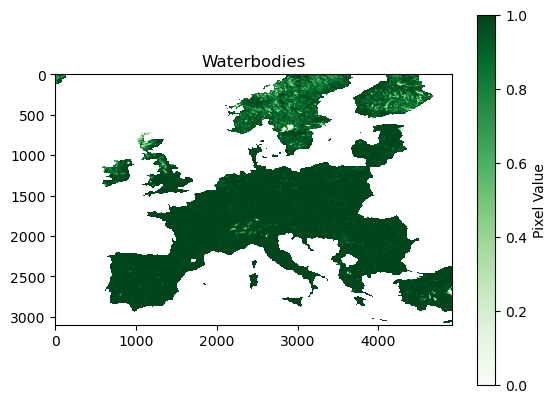

In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
   
file_path = 'C:/BO Soudal/Data/Rasters/Aligned_rasters/Waterbodies_align.tif'
with rasterio.open(file_path) as src:
    raster_data = src.read(1)
    nodata = -3.40282347e+38
   
    mask = np.isclose(raster_data, nodata)
    waterbodies_raster = np.ma.masked_array(raster_data, mask)
    
plt.imshow(waterbodies_raster, cmap = 'Greens')
plt.colorbar(label = 'Pixel Value')
plt.title('Waterbodies')
plt.show()